<h1>Lab | Random Forests</h1><br>

For this lab, you will be using the CSV files provided in the files_for_lab folder.

<h2>Instructions</h2><br>

* Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE.
* Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.

## Import libraries and dependencies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Import the dataset

In [2]:
categorical = pd.read_csv("files_for_lab/categorical.csv")
numerical = pd.read_csv("files_for_lab/numerical.csv")
target = pd.read_csv("files_for_lab/target.csv")

In [3]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [4]:
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [5]:
target.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


>**One can see that there are numerical features on the categorical dataset**

In [6]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         95412 non-null  object
 1   CLUSTER       95412 non-null  int64 
 2   HOMEOWNR      95412 non-null  object
 3   GENDER        95412 non-null  object
 4   DATASRCE      95412 non-null  int64 
 5   RFA_2R        95412 non-null  object
 6   RFA_2A        95412 non-null  object
 7   GEOCODE2      95412 non-null  object
 8   DOMAIN_A      95412 non-null  object
 9   DOMAIN_B      95412 non-null  int64 
 10  ODATEW_YR     95412 non-null  int64 
 11  ODATEW_MM     95412 non-null  int64 
 12  DOB_YR        95412 non-null  int64 
 13  DOB_MM        95412 non-null  int64 
 14  MINRDATE_YR   95412 non-null  int64 
 15  MINRDATE_MM   95412 non-null  int64 
 16  MAXRDATE_YR   95412 non-null  int64 
 17  MAXRDATE_MM   95412 non-null  int64 
 18  LASTDATE_YR   95412 non-null  int64 
 19  LAST

In [7]:
categorical.describe(include="all")

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
count,95412,95412.000000,95412,95412,95412.000000,95412,95412,95412,95412,95412.000000,...,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
unique,12,NaN,2,3,NaN,1,4,4,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,other,NaN,H,F,NaN,L,F,A,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,30457,NaN,74582,54234,NaN,95412,46964,34803,22106,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.215717,NaN,NaN,2.604756,NaN,NaN,NaN,NaN,1.914728,...,28.818356,2.880571,92.462835,6.367511,94.349201,6.940291,95.414340,6.666373,91.295644,6.087253
std,NaN,14.393713,NaN,NaN,0.623254,NaN,NaN,NaN,NaN,0.736644,...,22.086303,3.026832,2.680042,3.895435,1.735872,3.995867,0.525012,4.240891,3.211893,3.969286
min,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,...,0.000000,1.000000,75.000000,1.000000,75.000000,1.000000,95.000000,1.000000,0.000000,1.000000
25%,NaN,16.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1.000000,...,10.000000,1.000000,91.000000,2.000000,94.000000,3.000000,95.000000,2.000000,88.000000,2.000000
50%,NaN,29.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,2.000000,...,28.000000,2.000000,93.000000,6.000000,95.000000,7.000000,95.000000,7.000000,92.000000,7.000000
75%,NaN,40.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,2.000000,...,47.000000,2.000000,95.000000,10.000000,95.000000,11.000000,96.000000,11.000000,94.000000,10.000000


>**I will drop the feature 'RFA_2R' because it has only 1 unique value.**

In [8]:
numerical.describe()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,...,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,54.223117,61.611649,4.134721,7.058944,3.321438,1.048443,30.445332,29.702312,32.637719,6.842326,...,5.058242,7.933656,19.999790,17.313127,8.188467,13.347786,95778.176959,0.500618,1.910053,31.534356
std,953.844476,14.450539,1.699477,2.705654,9.306899,5.065522,11.470554,15.097752,17.709065,4.391699,...,4.526651,8.784231,25.067746,13.956630,7.777089,10.769997,55284.596094,0.500002,1.072749,18.751637
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,1.285714,1.000000,0.000000,1.000000,1.000000
25%,0.000000,52.000000,3.000000,5.000000,0.000000,0.000000,24.000000,20.000000,21.000000,4.000000,...,2.000000,3.000000,14.000000,10.000000,4.000000,8.384615,47910.750000,0.000000,1.000000,15.000000
50%,1.000000,61.611649,5.000000,9.000000,0.000000,0.000000,31.000000,29.000000,32.000000,6.000000,...,4.000000,5.000000,17.000000,15.000000,7.000000,11.636364,95681.500000,1.000000,2.000000,32.000000
75%,2.000000,71.000000,5.000000,9.000000,3.000000,0.000000,37.000000,39.000000,43.000000,9.000000,...,7.000000,10.000000,23.000000,20.000000,10.000000,15.477955,143643.500000,1.000000,3.000000,49.000000
max,72002.000000,98.000000,7.000000,9.000000,241.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,41.000000,1000.000000,5000.000000,1000.000000,1088.000000,1000.000000,191779.000000,1.000000,4.000000,62.000000


In [9]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TARGET_B  95412 non-null  int64  
 1   TARGET_D  95412 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [10]:
target.TARGET_B.value_counts(normalize=True)

0    0.949241
1    0.050759
Name: TARGET_B, dtype: float64

In [11]:
target.TARGET_D.value_counts(normalize=True)

0.00     0.949241
10.00    0.009862
15.00    0.006194
20.00    0.006047
5.00     0.005272
           ...   
18.25    0.000010
10.70    0.000010
2.50     0.000010
16.87    0.000010
44.21    0.000010
Name: TARGET_D, Length: 71, dtype: float64

>**I will use 'TARGET_B' as a target variable**

## Define the features and split train and test

In [12]:
# Choosing X as the concatenation of numerical and categorial features but the column 'RFA_2R'

X = pd.concat([numerical,categorical], axis = 1).drop(columns='RFA_2R')
y = target.TARGET_B

In [13]:
# Dummifying the categorical features

X = pd.get_dummies(X, drop_first = True)

In [14]:
# Train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling a Random Forest correcting the imbalance

Maximum accuracy:  0.9487501965099827  at K  10


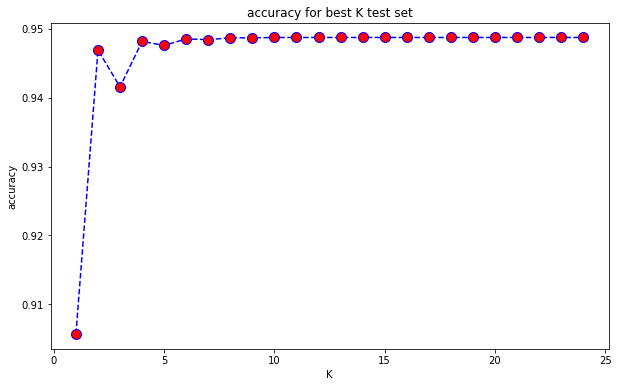

In [15]:
# Since we are going to use SMOTE, let's see wich is the best number of neighbours

accuracy=[]

for neighbor in range(1,25):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,25), accuracy, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("accuracy for best K test set")
plt.xlabel("K")
plt.ylabel("accuracy")
print("Maximum accuracy: ", max(accuracy), " at K ", accuracy.index(max(accuracy))+1)

In [16]:
# Importing SMOTE to correct the imbalance

from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=10)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [17]:
y_train.value_counts()/len(y_train)

0    0.949364
1    0.050636
Name: TARGET_B, dtype: float64

In [18]:
y_train_SMOTE.value_counts()/len(y_train_SMOTE)

0    0.5
1    0.5
Name: TARGET_B, dtype: float64

In [19]:
# Model with a random forest 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30, random_state=42)
classifier.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(min_samples_split=30, n_estimators=150, random_state=42)

In [20]:
# Classification report

pred_train_SMOTE = classifier.predict(X_train_SMOTE)
pred_test_SMOTE = classifier.predict(X_test)
print(classification_report(y_test, pred_test_SMOTE))
print(classification_report(y_train_SMOTE, pred_train_SMOTE))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18105
           1       0.14      0.01      0.02       978

    accuracy                           0.95     19083
   macro avg       0.55      0.50      0.50     19083
weighted avg       0.91      0.95      0.92     19083

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     72464
           1       1.00      0.97      0.99     72464

    accuracy                           0.99    144928
   macro avg       0.99      0.99      0.99    144928
weighted avg       0.99      0.99      0.99    144928



**CONCLUSION:**

* Our train set gets impressive results once we balance the data but our test set shows that our model is unable to learn the 1